
2017年度センタ＝試験　数学I・数学A　問題[3]
---

最大・最小値を求めるための方法をSymPyを使って理解しよう。

2017年1月に行われたセンター試験の問題を題材にする。
もしかしたらコンピュータに興味を持ってくれる高校生が増えるかもしれない。


問題
---

---

$a$を定数とし、$g(x)=x^2-2(3a^2+5a)x+18a^4+30a^3+49a^2+16$とおく。2次関数$y=g(x)$のグラフの頂点は
$$({\bf 【セ】}a^2+{\bf 【ソ】}a, {\bf 【タ】}a^4+{\bf 【チツ】}a^2+{\bf 【テト】})$$
である。

$a$が実数全体をうごくとき、頂点の$x$座標の最小値は$-\frac{{\bf 【ナニ】}}{{\bf 【ヌネ】}}$である。

次に$t=a^2$とおくと、頂点の$y$座標は
$$ 【タ】t^2+【チツ】t+【テト】$$
と表せる。したがって、$a$が実数全体を動くとき、頂点の$y$座標の最小値は${\bf 【ノハ】}$である。

---

こういった問題は数値演算では解きにくいので、数式の計算を記号で行うことのできるSymPyモジュールを使って解いていく。

まず、モジュールをインポートしよう。ついでに、プロットとプリティプリンティングの設定をしておく。

In [2]:
import sympy as sy
import sympy.plotting as splt
import seaborn as sns
%matplotlib inline
sy.init_printing()

関数$g(x)$を定義する。今回は$a$が定数と書いてあるが、実数全体で動かして考えるので、$a$も
変数とする。


In [3]:
x,a = sy.symbols('x a')
g=x**2 - 2*(3*a**2 + 5*a)*x + 18*a**4 + 30*a**3 + 49*a**2+16
g

aを変化させてグラフを書いて様子を見よう。試験ではこんなこと面倒でできないが・・・。

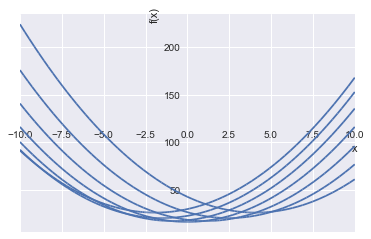

In [7]:
splt.plot(g.subs(a,-0.6),g.subs(a,-0.4),g.subs(a,-0.2),
    g.subs(a,0),g.subs(a,0.2),g.subs(a,0.4),g.subs(a,0.6))

極が動いているようである。

$g(x)$を微分してその$x$の値が0になる点が極であるので、これを求めよう。極を$(p_x, p_y)$とする。

In [40]:
dg=g.diff(x)
dg

この式$=0$とおいて、$x$について解く。

In [41]:
sy.solve(dg,x)


solveで求解すると一般に答えが複数出るので、配列で答えが返ってくる。xの一次式は一つしか解がないので、先頭の要素を選んでおこう。

In [42]:
px = sy.solve(dg,x)[0]
px

これを$g(x)$に代入すれば、極の$y$座標が求められる。

In [43]:
py=g.subs(x,px)
py

むむ、なんか複雑になってしまったぞ。expandで展開させて、様子を見よう。

In [44]:
px.expand(), py.expand()

お！これで解答欄をマークできそうである。

次は$x$の最小値だ。$x$の最小値は$p_x(a)$を$a$で偏微分すれば、求められる。

・・・あれ？高校で偏微分を教えていただろうか？指導要領の範囲外の問題は出せないが、$x$の項が消えてしまっていれば、「偏」微分ではないので良いのだろう。

さて、$p_x$を$a$で微分してその式が0となる$a$の値を$p_x$に代入する。$a$に関する2次式を見ているので、極は一つになるはずである。これを一行で書くとこうなる。

In [21]:
px.subs(a,sy.solve(px.diff(a))[0])

これも、マークできそうだ！

$y$の最小値についてはどうだろうか？
まず、問題通りに$t=a^2$として$t$の式に置き換えよう。

この時、直接は代入できないので、$a=\sqrt t$として代入する。

In [28]:
t=sy.symbols('t')
pyt=py.subs(a,sy.sqrt(t))
pyt.expand()

さて、極を求めればいいんだっけ？さっきの方法でもう一度求めよう。

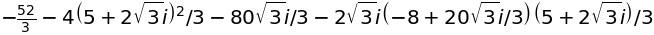

In [35]:
pyt.subs(t,sy.solve(pyt.diff(t))[0])

ちょｗｗｗｗ。expand()してみよう。前のセルの結果はアンダースコア"_"で参照できる。

In [36]:
_.expand()

シンプルになった・・・・・ってあれれれ、解答欄に収まらない。ちょっと極の$t$座標を確認してみよう。

In [37]:
sy.solve(pyt.diff(t))

ううむ。$a^2=t$としたので、$t$の定義域は$t\geq 0$だ。これではまずい。

概形を掴むために、グラフを描いてみよう。

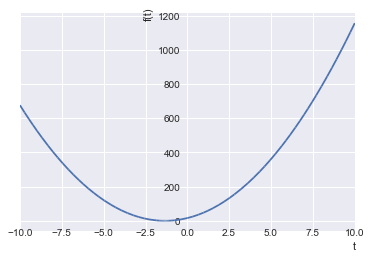

In [38]:
sy.plot(pyt)

極が原点の左側にあるので、$t=0$の時に最小値をとるようだ！計算してみよう。

In [39]:
pyt.subs(t,0)

でた！これで、解答欄にマークできそうだ。

以上のように、コンピュータで数式を記号演算する仕組みをcomputer algebra system (CAS)という。
数学で出る問題のたいていはこのCASで解くことができる。

SymPy以外にも
- Mathematica
- Reduce
- Maxima
- Maple

などがある。これらのソフトウェアは関数型言語が組み込まれていて、ちょっとマニアックであるが、
関数型言語は数学と相性がいい。興味があったら調べてみるとよいだろう。